# 波士顿房价
线性回归模型

单变量线性回归/多变量



In [1]:
import pandas as pd#导入pands库
import numpy as np#导入numpy库
import matplotlib.pyplot as plt#导入绘图库
%matplotlib inline

In [2]:
#数据预处理
data=pd.read_csv("D:\Desktop\data.csv")#用pands导入数据集
print(data.head())#打印出数据集的头部

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
print(data.columns)#打印出数据集的列名
print(data.info())#打印出数据集的基本信息
print(data.describe())#对整个数据集的数据进行数据特征分析
print(data.corr())#每个数据之间的相关系数
print(data.isnull().sum())#检查1数据集有无空值，结果为无

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  

In [4]:
data_1=np.array(data)#用numpy库转化为数组
print(data_1.shape)#查看数据集有几行几列，即506行14列
print(data_1.dtype)#查看数据类型

(506, 14)
float64


In [5]:
#特征值与目标变量分离
#设置列标题
x=data.drop(["medv"],axis=1).values#设置x，是没有medv的数据
y=data.loc[:,["medv"]].values#设置y，是只有medv一列的数据
x1=data.loc[:,"crim"].values.reshape(-1,1)
x2=data.loc[:,"zn"].values.reshape(-1,1)
x3=data.loc[:,"indus"].values.reshape(-1,1)
x4=data.loc[:,"chas"].values.reshape(-1,1)
x5=data.loc[:,"nox"].values.reshape(-1,1)
x6=data.loc[:,"rm"].values.reshape(-1,1)
x7=data.loc[:,"age"].values.reshape(-1,1)
x8=data.loc[:,"dis"].values.reshape(-1,1)
x9=data.loc[:,"rad"].values.reshape(-1,1)
x10=data.loc[:,"tax"].values.reshape(-1,1)
x11=data.loc[:,"ptratio"].values.reshape(-1,1)
x12=data.loc[:,"b"].values.reshape(-1,1)
x13=data.loc[:,"lstat"].values.reshape(-1,1)

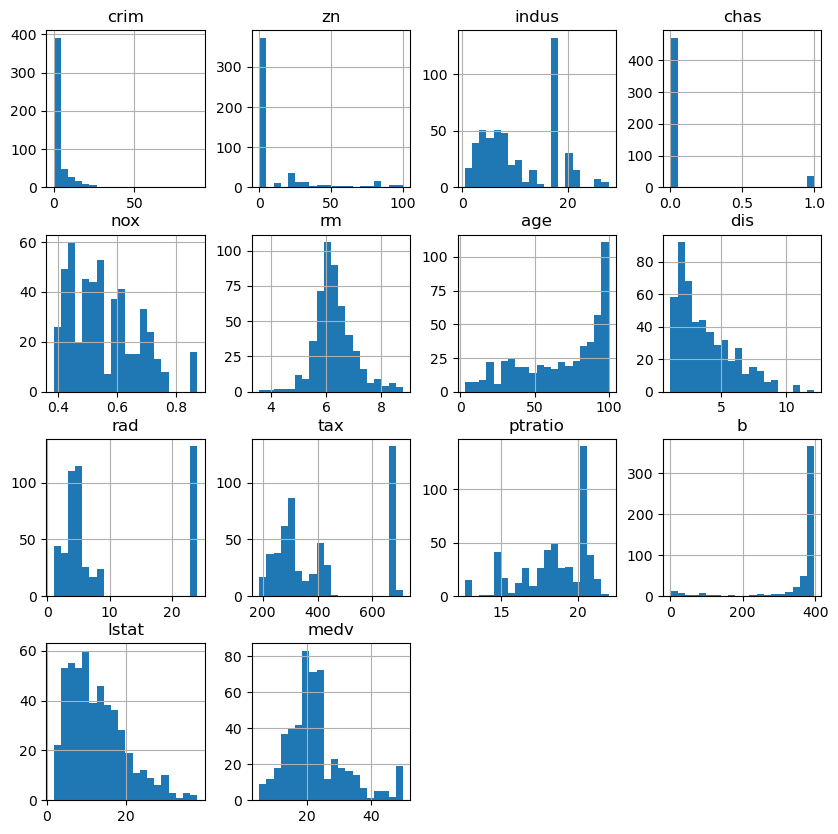

In [6]:
#数据可视化
#先把握住单个数据的情况
plt.style.use({"figure.figsize":(10,10)})#绘制直方图，加载样式表
data.hist(bins=20)#绘制直方图，数据被分成20个等宽的区间
plt.show()

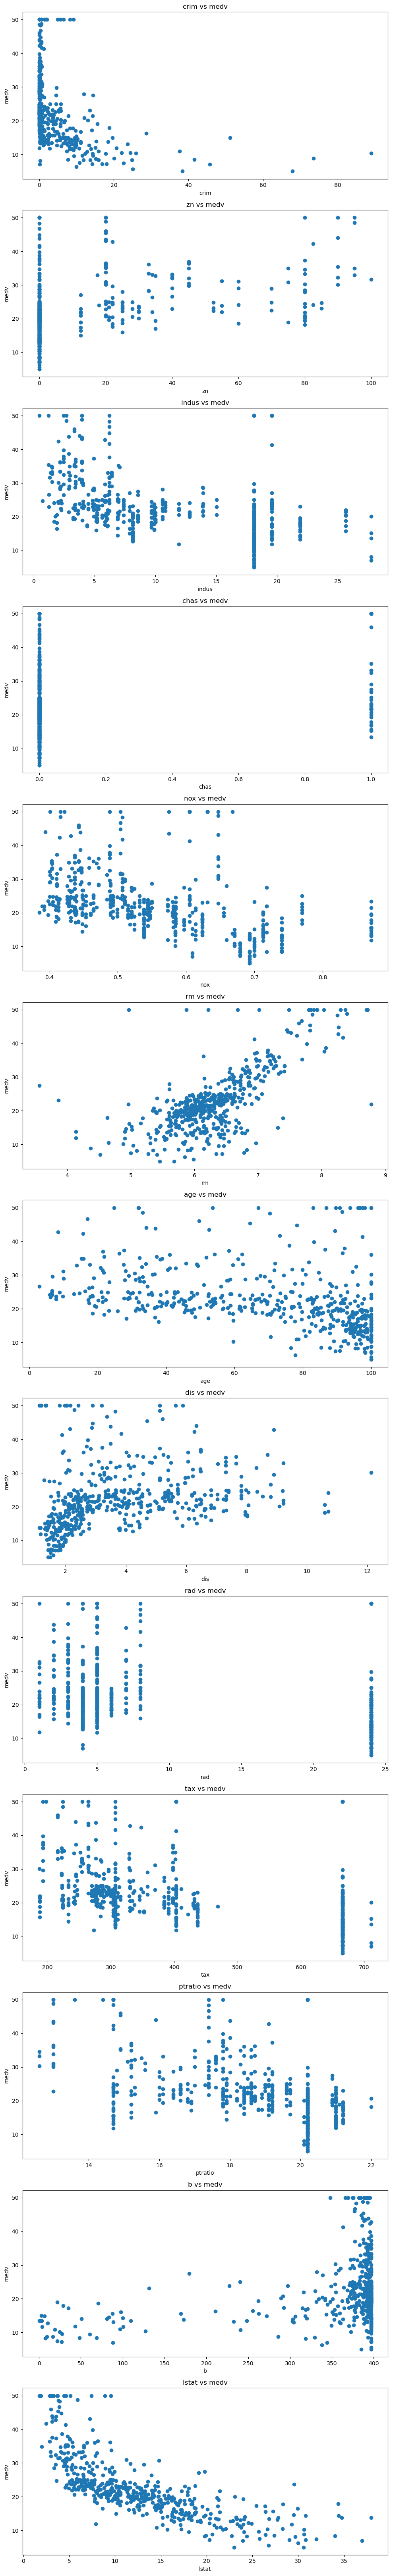

In [7]:
#x与y之间，即全部变量和结果的关系图
#绘制散点图
features=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']#定义特征列表
num_features=len(features)#得到列表的长度
fig,axes=plt.subplots(nrows=num_features,ncols=1,figsize=(10,5*num_features))#创建多子图，13行一列
for i,feature in enumerate(features):#遍历特征列表
    axes[i].scatter(data[feature], y)#绘制出散点图
    axes[i].set_title(f"{feature} vs medv")
    axes[i].set_xlabel(feature)#x轴标签
    axes[i].set_ylabel("medv")#y轴标签
plt.tight_layout()#调整布局
plt.show()

通过绘制特诊值与目标变量之间的散点图，我们可以看出来indus，nox，rm，age，dis，ptratio，lstat
现在来统计居住在chas的居民比例，这里用散点图来绘制，但其实通过前面分析发现它跟medv的关系不大，所以这里绘制除扇形图来直观显示比例即可

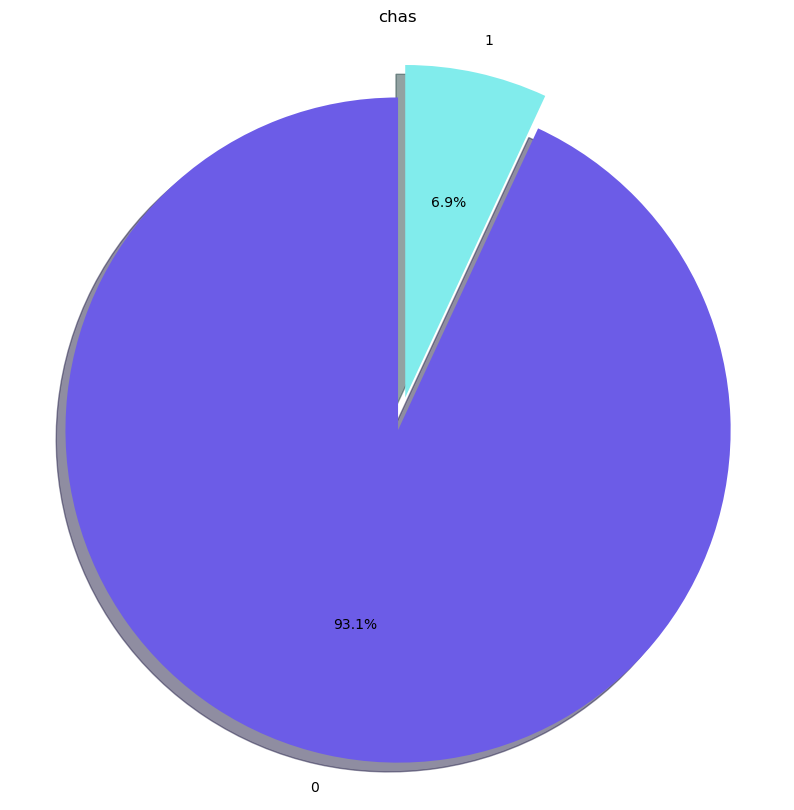

In [8]:
x4=np.array(x4)
count_0=np.sum(x4==0)#计算0的数量
count_1=np.sum(x4==1)#计算1的数量
total_count=np.sum(x4)#计算总数量
ratio_0=count_0/total_count#计算比例
ratio_1=count_1/total_count
labels=["0","1"]#设置标签
sizes=[ratio_0,ratio_1]#设置大小
colors = ["#6c5ce7", "#81ecec"] #设置颜色
explode=[0.1,0]#突出第一个扇形
#绘制扇形图
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=90,labeldistance=1.1, pctdistance=0.6)
plt.axis('equal')
plt.title("chas")
plt.show()

通过它们的散点图，我们可以看出来indus，nox，rm，age，dis，ptratio，lstat对medv的值有明显的影响，所以下面用线性回归模型进行拟合，找出单变量与medv之间的关系，然后找出损失函数值最小的

从这个扇形图可以直观看出波士顿大部分居民是住在查尔斯河边的，这跟我们的资料信息一致

处理数据

In [9]:
class Dataprocessor:
    def __init__(self):
        pass

    def process_data(self,X):
        """
        将数据转为矩阵
        :param X:
        :return: 处理后的矩阵
        """
        ones_column=np.ones((x.shape[0],1))#一列值为1的数据
        X=np.concatenate((ones_column,X),axis=1)#将值为1的这一列数据插入到X前面
        return X


我们需要先做的事情是定义损失函数

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 $$

$h_{\theta}(x) = \theta^T X = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$


这里我们有两种方法，一个是最小二乘法，一个是梯度下降法

In [10]:
def costfunction(X,Y,theta):#定义损失函数
    """
    计算损失函数的值
    :param X: 特征矩阵
    :param Y: 目标值向量
    :param theta: 参数向量
    :return: 损失函数的值
    """
    inner=np.power(X*theta.T-Y)#计算预测值与真实值的平方
    return np.sum(inner)/2*(len(X))#计算损失函数的值

以下是最小二乘法

In [11]:
def least_square(X,Y):
    """
    用最小二乘法求出参数向量
    :param X:
    :param Y:
    :return:
    """
    theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta

以下是梯度下降法

In [12]:
def gradientdescent(X,Y,iterations=1000,learning_rate=0.01):
    """
    使用批量梯度下降的方法更新参数值
    :param X: 特征矩阵
    :param Y: 目标值向量
    :param learning_rate:学习率
    :param iterations: 迭代次数
    :return: 更新后的参数向量
    """
    theta=np.zeros(X.shape[1])
    for iteration in range(iterations):
        theta=np.zeros(X.shape[1])
        theta-=learning_rate*(2*theta*X.T.dot(X)-2*X.T.dot(Y))/len(Y)
    return theta

In [13]:
def predict(X,theta):
    """
    使用线性回归模型进行预测
    :param X:
    :param theta:
    :return:
    """
    return X.dot(theta)#返回求出来的预测值

以下是评估指标

In [14]:
def mse(Y,Y_predict):
    """
    求出均方误差的方法
    :param Y:
    :param Y_predict:
    :return:
    """
    mse=np.mean((Y-Y_predict)**2)
    return mse

In [15]:
def r2_score(Y,Y_predict):
    """
    求出决定系数的函数
    :param Y: 目标值向量
    :param Y_predict: 预测值向量
    :return: 决定系数
    """
    rss=np.sum((Y-Y_predict)**2)#回归平方和
    sst=np.sum((Y-np.mean(Y))**2)#总平方和
    if sst == 0:
        return 1.0 if rss == 0 else 0.0
    return 1-rss/sst

In [16]:
def train_model(X,Y,method="least_square",iterations=100,learning_rate=0.01):
    """
    训练线性回归模型
    :param X:
    :param Y:
    :param method:
    :param iterations:
    :param learning_rate:
    :return:参数向量theta
    """
    if method=="least_square":#如果方法是用最小二乘法，那就调用对应的函数
        theta=least_square(X,Y)
    elif method=="gradientdescent":#如果方法是用梯度下降法，就调用其对应的函数
        theta=gradientdescent(X,Y,iterations=iterations,learning_rate=learning_rate)
    else:
        raise ValueError("method must be 'least_square' or 'gradientdescent'")#两个方法都不是就报错
    return theta

In [17]:
def paint(X,Y,Y_predict):
    """

    :param X: 一列x的值
    :param Y: 一列y的值
    :param Y_predict: 一列y的预测值
    :return: 图像
    """
    fig1=plt.figure(figsize=(5,5))#创建窗口
    plt.scatter(X,Y,label="实际值")#绘制出散点，真实值的
    plt.plot(X,Y_predict,label="预测值")#绘制出直线，线性回归直线的
    plt.show()

现在以x3的数据为例，预测房价，并直观表示出图像

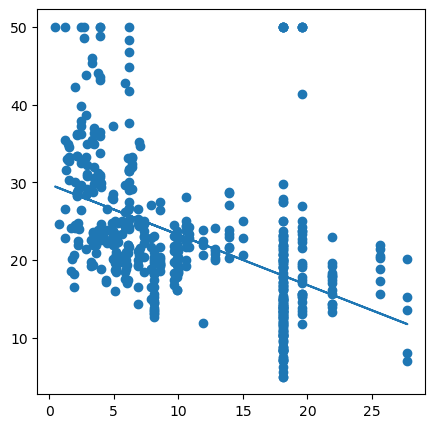

In [18]:
if __name__=="__main__":
    dp=Dataprocessor()
    x3_processed=dp.process_data(x3)#处理x3数据
    theta_3=train_model(x3_processed,y,method="least_square")#求出theta
    y3_predict= predict(x3_processed, theta_3)#求出预测值
    paint(x3,y,y3_predict)#绘制图像

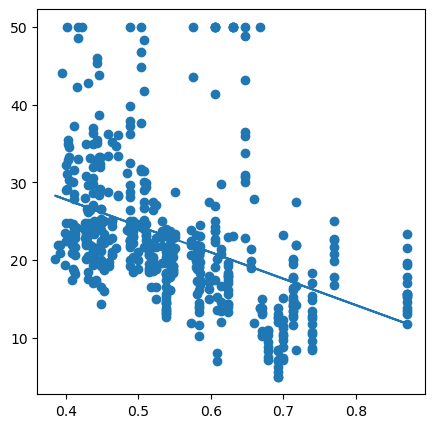

69.0042883554067 0.1826030425016988


In [19]:
if __name__=="__main__":
    dp=Dataprocessor()
    x5_processed=dp.process_data(x5)
    theta_5=train_model(x5_processed,y,method="least_square")
    y5_predict= predict(x5_processed, theta_5)
    paint(x5,y,y5_predict)
    mse_5=mse(y,y5_predict)
    r2_5=r2_score(y,y5_predict)
    print(mse_5,r2_5)

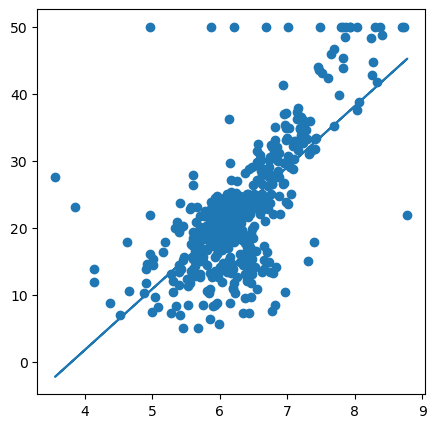

43.60055177116956 0.48352545599133423


In [20]:
if __name__=="__main__":
    dp=Dataprocessor()
    x6_processed=dp.process_data(x6)
    theta_6=train_model(x6_processed,y,method="least_square")
    y6_predict= predict(x6_processed, theta_6)
    paint(x6,y,y6_predict)
    mse_6=mse(y,y6_predict)
    r2_6=r2_score(y,y6_predict)
    print(mse_6,r2_6)

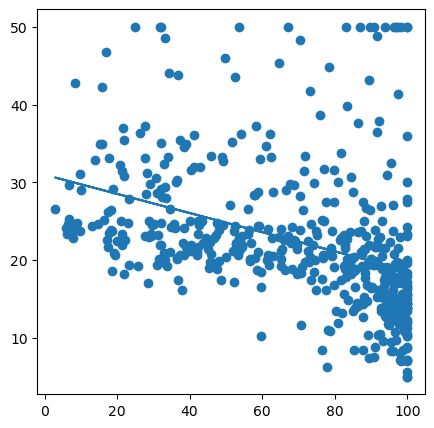

72.42398092899336 0.14209474407780465


In [21]:
if __name__=="__main__":
    dp=Dataprocessor()
    x7_processed=dp.process_data(x7)
    theta_7=train_model(x7_processed,y,method="least_square")
    y7_predict= predict(x7_processed, theta_7)
    paint(x7,y,y7_predict)
    mse_7=mse(y,y7_predict)
    r2_7=r2_score(y,y7_predict)
    print(mse_7,r2_7)

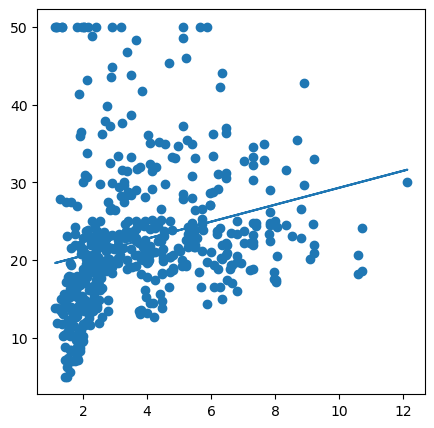

79.14634158607109 0.062464372121782796


In [22]:
if __name__=="__main__":
    dp=Dataprocessor()
    x8_processed=dp.process_data(x8)
    theta_8=train_model(x8_processed,y,method="least_square")
    y8_predict= predict(x8_processed, theta_8)
    paint(x8,y,y8_predict)
    mse_8=mse(y,y8_predict)
    r2_8=r2_score(y,y8_predict)
    print(mse_8,r2_8)

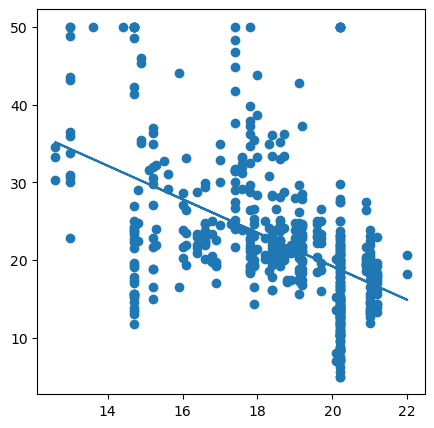

62.652200013769274 0.257847318009223


In [23]:
if __name__=="__main__":
    dp=Dataprocessor()
    x11_processed=dp.process_data(x11)
    theta_11=train_model(x11_processed,y,method="least_square")
    y11_predict= predict(x11_processed, theta_11)
    paint(x11,y,y11_predict)
    mse_11=mse(y,y11_predict)
    r2_11=r2_score(y,y11_predict)
    print(mse_11,r2_11)

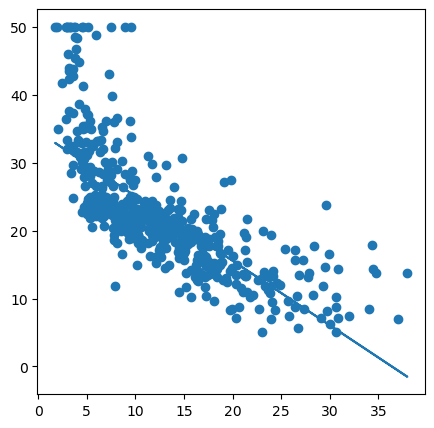

38.48296722989415 0.5441462975864797


In [24]:
if __name__=="__main__":
    dp=Dataprocessor()
    x13_processed=dp.process_data(x13)
    theta_13=train_model(x13_processed,y,method="least_square")
    y13_predict= predict(x13_processed, theta_13)
    paint(x13,y,y13_predict)
    mse_13=mse(y,y13_predict)
    r2_13=r2_score(y,y13_predict)
    print(mse_13,r2_13)

接下来，要比较哪个与medv相关性更强，我们分析mse和r2_score,综合得出lstat最好
由此得出结论，房价高低与低收入阶层关系密切

多变量线性回归

In [25]:
data1=np.concatenate((x8,x9),axis=1)#两个变量同时参与拟合
print(data1)
if __name__=="__main__":
    dp=Dataprocessor()
    data1=(data1-data1.mean())/data1.std()#特征归一化
    data1_processed=dp.process_data(data1)#处理数据
    theta_data1=train_model(data1_processed,y,method="least_square")
    data1_predict= predict(data1_processed, theta_data1)
    mse_data1=mse(y,data1_predict)
    r2_data1=r2_score(y,data1_predict)
    print(mse_data1,r2_data1)

[[4.09   1.    ]
 [4.9671 2.    ]
 [4.9671 2.    ]
 ...
 [2.1675 1.    ]
 [2.3889 1.    ]
 [2.505  1.    ]]
71.70649130860212 0.15059383662294856


分析了，这两项对medv的影响不大，也同样类比其其他的，可以看出，当前对medv影响最大的是lstat

多项式特征回归--单特征版

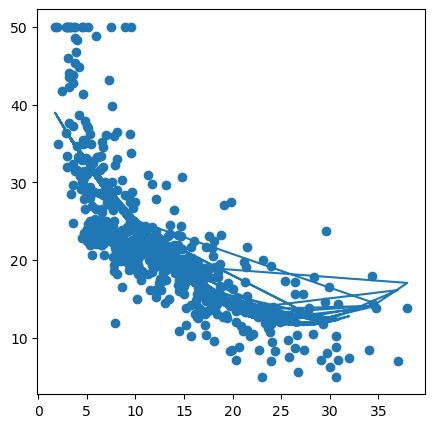

30.3305200758537 0.6407168971636613


In [26]:
#这里用曲线拟合数据
x13_squared=x13*x13
data2=np.concatenate((x13_processed,x13_squared),axis=1)
data2=(data2-data2.mean())/data2.std()
theta_x13_poly_2=train_model(data2,y,method="least_square")
y13_predict_poly_2= predict(data2, theta_x13_poly_2)
paint(x13,y,y13_predict_poly_2)
mse_13_poly_2=mse(y,y13_predict_poly_2)
r2_13_poly_2=r2_score(y,y13_predict_poly_2)
print(mse_13_poly_2,r2_13_poly_2)

可以看到，这里的r2_score较之前的高了许多，倘若我们一直这样子下去，就可以让r2_score不断接近1

但是在这里，r2_score仍然有0.64

最终，我们可以通过这个预测出房价